# Handling BMTF Stub Data with Awkward Arrays

## Imports

In [4]:
import numpy as np
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import mplhep as hep
import hist

hep.style.use("CMS")

## Constants

In [2]:
FONTSIZE  = 22
FIGSIZE   = (10, 8)

CMS_PALETTE_1 = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]
CMS_PALETTE_2 = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"]

In [3]:
ONE_LUMI_IN_ORBITS = 2**18
ONE_ORBIT_IN_BX    = 3564
ONE_BX_IN_NS       = 25

ONE_LUMI_IN_NS = ONE_LUMI_IN_ORBITS * ONE_ORBIT_IN_BX * ONE_BX_IN_NS

ONE_LUMI_IN_S = ONE_LUMI_IN_NS / 1e9

## Functions

In [4]:
def draw_cms_label(ax: plt.Axes, label: str = "Preliminary", rlabel: str = "L1DS", fontsize: int = 28, data: bool = True):
    """
    Draw a CMS label on the given matplotlib Axes object.

    Parameters:
    -----------
    ax : matplotlib.axes.Axes
        The Axes object to draw the label on.
    label : str, optional
        The label text to display (default is "Preliminary").
    rlabel : str, optional
        The right label text to display (default is "NPLM").
    fontsize : int, optional
        The font size to use for the label (default is 28).
    """
    hep.cms.label(
        ax       = ax,
        data     = data,
        label    = label,
        rlabel   = rlabel,
        fontsize = fontsize
    )

def set_label_font(ax: plt.Axes, fontsize: int = 28):
    """
    Set the font size of the x and y axis labels of a matplotlib Axes object.
    
    Parameters:
    ax (matplotlib.pyplot.Axes): The Axes object to modify.
    fontsize (int): The font size to set the labels to. Default is 28.
    """
    ax.set_xlabel(ax.get_xlabel(), fontsize = fontsize)
    ax.set_ylabel(ax.get_ylabel(), fontsize = fontsize)
    
    
def set_tick_font(ax: plt.Axes, fontsize: int = 28):
    """
    Set the font size of the tick labels for the given Axes object.
    
    Parameters:
    -----------
    ax : matplotlib.axes.Axes
        The Axes object for which to set the tick font size.
    fontsize : int, optional
        The font size to use for the tick labels. Default is 28.
    """
    ax.tick_params(axis = "x", labelsize = fontsize, which = "major")
    ax.tick_params(axis = "y", labelsize = fontsize, which = "major")
    
    
def draw_grid(ax: plt.Axes, which: str = "major", axis: str = "both", alpha: float = 0.2, color: str = "gray", ls: str = "-"):
    """
    Draw a grid on the given matplotlib Axes object.
    
    Parameters:
    -----------
    ax: plt.Axes
        The matplotlib Axes object on which to draw the grid.
    """
    ax.grid(True, which = which, axis = axis, alpha = alpha, color = color, ls = ls)
    ax.set_axisbelow(True)

In [5]:
def convert_counts_to_khz(counts, n_ls=1):
    return counts / n_ls / ONE_LUMI_IN_S / 1e3

def convert_counts_to_hz(counts, n_ls=1):
    return counts / n_ls / ONE_LUMI_IN_S

## Data

In [6]:
# file = "./ntupleStubsGmt.root"
file = "./ntupleStubsBmtfGmt_LS264.root"

In [7]:
stub_features = ['orbit', 'bx', 'nStubs', 'stubHwPhi', 'stubHwPhiB', 'stubHwQual', 'stubHwEta', 'stubHwQEta', 'stubStation', 'stubWheel', 'stubSector', 'stubTag']

with uproot.open(file) as f:
    evs = f["bmtfNtuplizer/Events"]
    stubs_awk = evs.arrays(stub_features, library="ak")

In [8]:
stubs_awk

<Array [{orbit: 69033996, bx: 80, ...}, ...] type='2913647 * {orbit: uint32...'>

## Example Usage

### Extract the Filling Scheme (Rate per BX)

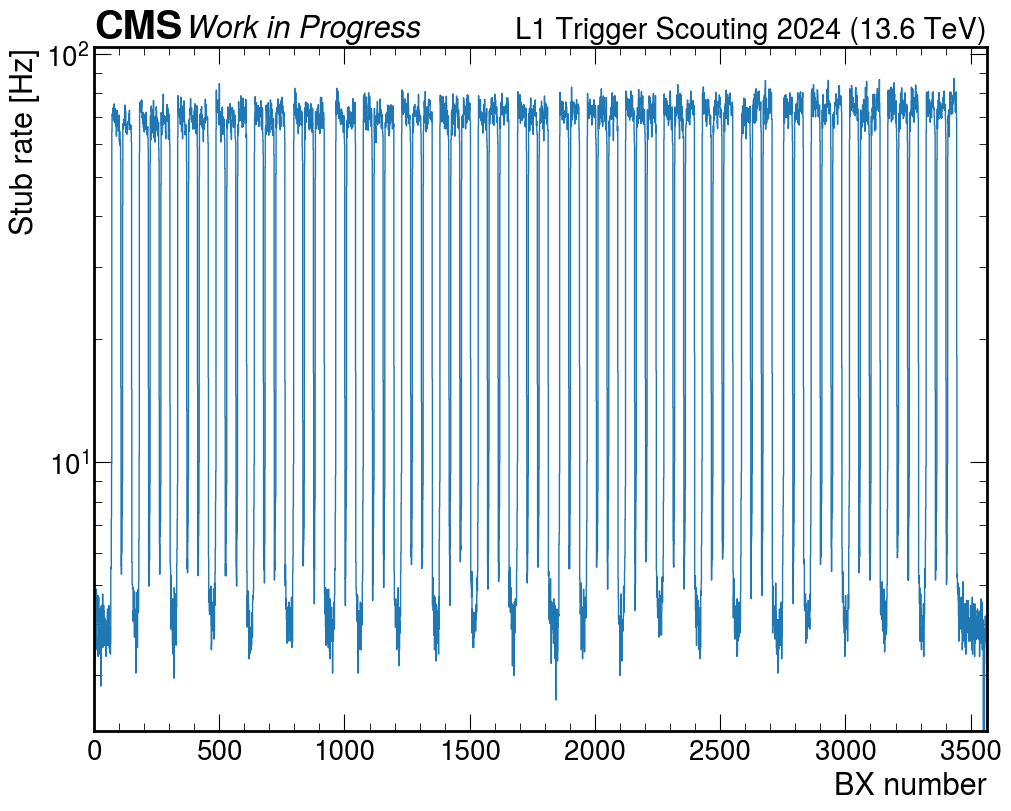

In [22]:
bx_stub_counts = np.bincount(stubs_awk.bx, weights=stubs_awk.nStubs)
bx_range = np.arange(3566)

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_cms_label(ax, fontsize=FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

# Plot the occupancy per BX
ax.hist(bx_range[:-1], bins=bx_range, weights=convert_counts_to_hz(bx_stub_counts), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')

ax.set_xlim(0, 3564)

ax.set_yscale('log')

plt.show()

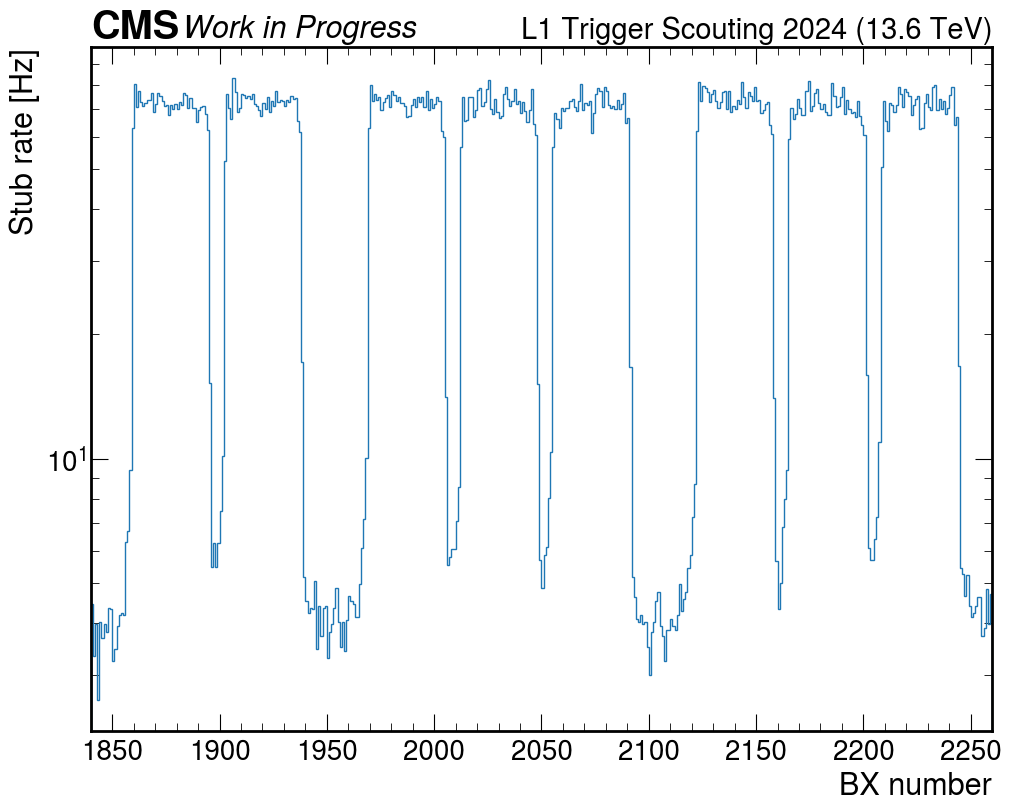

In [10]:
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_cms_label(ax, fontsize=FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

bx_left = 1840
bx_right = 2260

# Plot the occupancy per BX (zoom between BX 300 and 500)
ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=convert_counts_to_hz(bx_stub_counts[bx_left:bx_right]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')

ax.set_xlim(bx_left, bx_right)

ax.set_yscale('log')

plt.show()

### Plot the Stub Multiplicity per BX

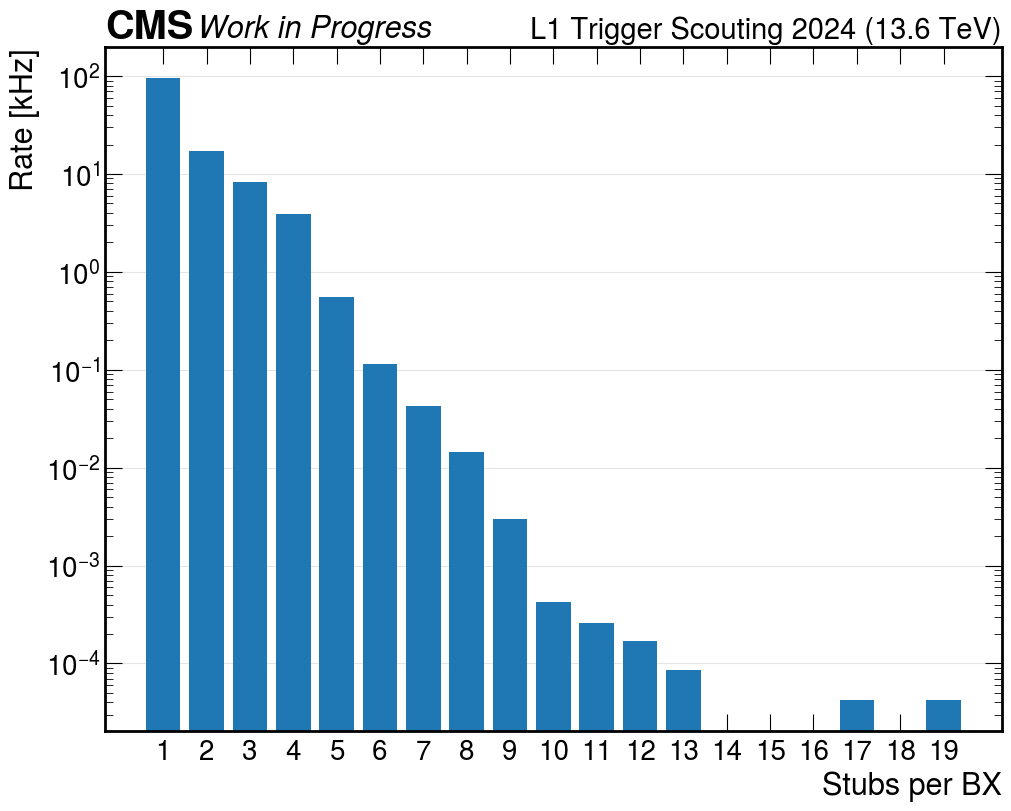

In [11]:
stub_count_per_bx = np.bincount(stubs_awk.nStubs)

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize=FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

mult_range = np.arange(1, len(stub_count_per_bx))

ax.bar(mult_range, convert_counts_to_khz(stub_count_per_bx[mult_range]))
ax.set_xticks(mult_range)
ax.xaxis.set_minor_locator(plt.NullLocator())

ax.set_xlabel('Stubs per BX')
ax.set_ylabel('Rate [kHz]')
ax.set_yscale('log')
plt.show()


### Plot the Stub Rate per Sector

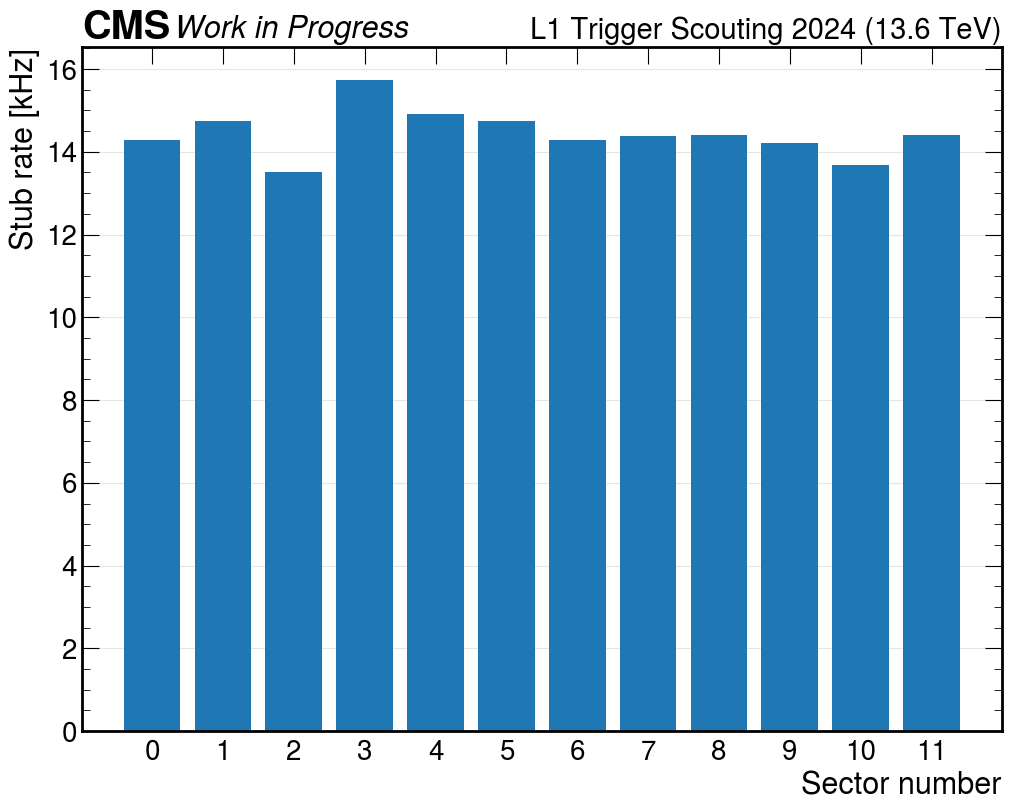

In [12]:
nStubs_per_sector = np.bincount(ak.flatten(stubs_awk['stubSector']))

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize=FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(range(12), convert_counts_to_khz(nStubs_per_sector, n_ls=1))

ax.set_xlabel('Sector number')
ax.set_ylabel('Stub rate [kHz]')

# disable minor ticks
ax.xaxis.set_minor_locator(plt.NullLocator())

ax.set_xticks(range(12))

plt.show()